In [48]:
# General Python
import sys
import os
sys.path.append('./')


# Data structures
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
dpi = 200
mpl.rc("savefig", dpi=dpi)
%matplotlib inline
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy import stats
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import seaborn as sns
import math
import re

from lmfit import minimize, Parameters, report_fit
from matplotlib.colors import LogNorm

#additional imports
import pandas as pd
from Bio import SeqIO, SeqRecord,Seq
import mkl_random
import random

import os
import subprocess
from Bio import Entrez, SeqIO
from copy import deepcopy
from pathlib import Path
import statistics

import datetime
import time
import json
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord


import seaborn as sb


In [55]:
##import CSV as dataframe

qpcr_data=pd.read_csv('/Users/mja/Appel_MutSequencing/ecoli_qpcr/20200702_final_summary.csv')

qpcr_data.rename(columns={'sample':'names'}, inplace=True)


ten1_samples=qpcr_data[(qpcr_data.names == '1/10')]
ten1_samples_list=list(ten1_samples.conc) 

ten3_samples=qpcr_data[(qpcr_data.names == '1/1000')]
ten3_samples_list=list(ten3_samples.conc) 


ten4_samples=qpcr_data[(qpcr_data.names == '1/10000')]
ten4_samples_list=list(ten4_samples.conc) 

pcr_samples=qpcr_data[(qpcr_data.names == '1/5000')]
pcr_samples_list=list(pcr_samples.conc) 


pcr_samples_list


[0.000340501,
 0.0015916910000000001,
 0.000531265,
 0.00039461199999999997,
 0.00012180700000000001,
 0.0007223980000000001]

In [56]:
qpcr_data

,num,names,conc,dilution
0,1,1/10,0.561078,0.1000
1,2,1/10,1.409012,0.1000
2,3,1/10,0.916957,0.1000
3,4,1/10,0.699935,0.1000
4,5,1/10,0.574431,0.1000
5,6,1/10,1.575330,0.1000
6,7,1/1000,0.000889,0.0010
7,8,1/1000,0.002057,0.0010
8,9,1/1000,0.002027,0.0010
9,10,1/1000,0.000160,0.0010


<Figure size 432x288 with 0 Axes>

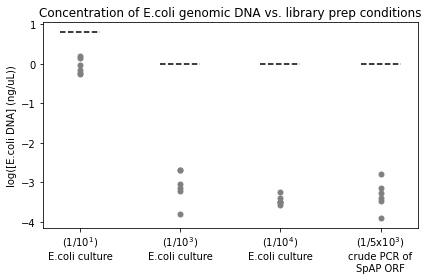

In [12]:
##Make plot of AVERAGE coverage per variant type

plt.clf()
# # data = np.random.rayleigh(scale=1, size=(30,4))
labels = ["(1/$10^1$)\nE.coli culture", 
          "(1/$10^3$)\nE.coli culture", 
          "(1/$10^4$)\nE.coli culture", 
          "(1/5x$10^3$)\ncrude PCR of\nSpAP ORF"]

data=[ten1_samples_list,ten3_samples_list,ten4_samples_list,pcr_samples_list]


width=0.4
fig, ax = plt.subplots()
for i, l in enumerate(labels):
    x = [i]*len(data[i])

    
    y=[math.log10(i) for i in data[i]]
    ax.scatter(x, y, color='gray', s=25)


#     ax.scatter(x, data[i], color=colors[i], s=25)
    median = statistics.median(data[i])
    ax.plot([i-width/2., i+width/2.],[median,median], color="k", linestyle='dashed')

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylabel('log([E.coli DNA] (ng/uL))', rotation=90)
ax.set_title('Concentration of E.coli genomic DNA vs. library prep conditions')
plt.tight_layout()

# plt.savefig('/home/mason/Desktop/2020_Library_prep_expts/qpcr_summary_plots/20200704_log_scatter_plot.pdf')

# plt.savefig('/home/mason/Desktop/2020_Library_prep_expts/qpcr_summary_plots/20200704_log_scatter_plot.eps')
# plt.savefig('/home/mason/Desktop/2020_Library_prep_expts/qpcr_summary_plots/20200704_log_scatter_plot.png', dpi=100)

plt.show()


<Figure size 432x288 with 0 Axes>

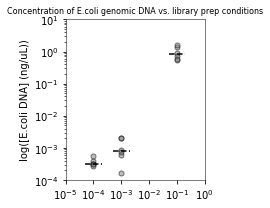

In [77]:
plt.rcParams['axes.linewidth'] = 0.5 #set the value globally


plt.clf()
# # data = np.random.rayleigh(scale=1, size=(30,4))
labels = ["(1/$10^1$)", 
          "(1/$10^3$)", 
          "(1/$10^4$)"]

data=[ten1_samples_list,ten3_samples_list,ten4_samples_list]

dilution=[[0.1,0.1,0.1,0.1,0.1,0.1], [0.001,0.001,0.001,0.001,0.001,0.001], [0.0001,0.0001,0.0001,0.0001,0.0001,0.0001]]

width=0.4
fig, ax = plt.subplots(1,1, figsize=(3,3))
for i, l in enumerate(labels):
    x = dilution[i]
    ax.scatter(x, data[i], color='gray',alpha=0.5,edgecolor='k', s=25)
    median = statistics.median(data[i])
#     ax.plot([i-width/2., i+width/2.],[median,median], color="k", linestyle='dashed')
    ax.plot([x[i]*0.5, x[i]*2],[median,median], color="k", linestyle='dashed')


    
ax.set_ylim(0.0001,10)
ax.set_xlim(0.00001,1)


ax.set_yscale('log')
ax.set_xscale('log')


ax.set_xticks([0.00001, 0.0001, 0.001, 0.01, 0.1,1])
# ax.set_xticklabels(labels)
ax.set_ylabel('log([E.coli DNA] (ng/uL))', rotation=90)
ax.set_title('Concentration of E.coli genomic DNA vs. library prep conditions', fontsize=8)
plt.tight_layout()

plt.savefig('/Users/mja/Appel_MutSequencing/ecoli_qpcr/20210616_ecoli_dna_qpcr_supplemental.png')
plt.savefig('/Users/mja/Appel_MutSequencing/ecoli_qpcr/20210616_ecoli_dna_qpcr_supplemental.pdf')
plt.show()



In [16]:
ten1_samples_list

[0.561078326,
 1.4090124259999999,
 0.916956797,
 0.6999347920000001,
 0.574430706,
 1.5753296730000002]